<img style="float: left;margin:0 10px 10px 0" src="Intro_to_Python_2\DSS_logo2.png" width=80>

#  Introduction to Python: Workshop 2

#### Content created by Francesca Pontin [francescapontin.com](http://francescapontin.com/teaching_materials.html)

Welcome to workshop 2/3 of the Leeds Data Science Society' Introduction to Python workshop series. We highly recommend you look at week 1 if you haven't already. 
The following content was covered in week 1 and will be used this week without much explanation. <br>
#### Workshop (1/3):
- Running cells in Jupyter Notebooks
- Adding and removing cells in Jupyter Notebooks
- Importing Packages
- Using Pandas to create dataframes
- Summarising data
- Using the <code>loc</code> and <code>iloc</code> functions to identify and clean data incorrect data
- Various data visualisation methods using matplotlib and seaborn

#### In this workshop (2/3) we will cover:
- Using real life data
- Data exploration
- More complex visulisations
- Grouping data to apply functions
- Considering how we haddle different data types differently
- Time series data
- OLS regression
- Generalised linear models (for count outcomes)
<br>

- You will have the opportunity to do more independent coding

N.B. Some stats. will be used for data analysis and regression. The focus will be on coding in python so the statistical theory will not be covered in great detail.


#### Load the relevant packages for this week
Note the packages explanations
<br> <font color='orchid'> <b>Run the code below </b></font>

In [2]:
import pandas as pd # package providing high-performance, easy-to-use data structures and data analysis tools
import matplotlib.pyplot as plt # package for plotting data
import seaborn as sns # statistical data visualization
import sklearn # package for machine learning

## Read in data
For most of this workshop we will be using bike share data from Transport for London, downloaded from Kaggle https://www.kaggle.com/hmavrodiev/london-bike-sharing-dataset. I have downloaded the data and saved it as a csv file for you in the notebook directory. You can also download the dataset yourselves.
#### Note about Kaggle
Kaggle is a great source of datasets which are free to download to get started with doing some data analysis. They also run data challenges where a dataset and problem will be given for you to solve. Often a reward for doing well in the challenge will be a job interview with the company or organisation who set the challenge.
<br> <font color='orchid'> <b>Run the code below </b></font>

In [2]:
# read in data from a csv file to a pandas dataframe
# if you have downloaded the file yourself and saved it elsewhere remember to change the ("file directory")

bike = pd.read_csv("london_merged.csv")

## Data Exploration

Explore the data yourselves using the <code>.head()</code>, <code>.tail()</code> and <code>.describe()</code> functions introduced last week.
<br> <font color='orchid'> <b>Write your own code below </b></font>

<div class="alert alert-block alert-info">
<b>Remember:</b> To add a new cell select the cell above where you want to add it (so it is surrounded by a blue box) and type 'b' to add the new cell below.
</div>

In [3]:
# explore the data


In [4]:
# explore the data


##  What is the bike share data?
If you are unfamiliar with the concept of bike sharing in the UK have a quick read of this [article](https://tfl.gov.uk/modes/cycling/santander-cycles/how-it-works) <br>

Some metadata information about the variables:
- <b>cnt</b>: The count of new bike shares
- <b>timestamp</b>: date and time of new bike share
- <b>t1</b>: real temperature in Celsius
- <b>t2</b>: "feels like" temperature in Celsius 
- <b>hum</b>: humidity in percentage
- <b>wind_speed</b>: wind speed in km/h
- <b>weather_code</b>: category of the weather
    - Description:
        - 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
        - 2 = scattered clouds / few clouds
        - 3 = Broken clouds
        - 4 = Cloudy
        - 7 = Rain/ light Rain shower/ Light rain
        - 10 = rain with thunderstorm
- <b>is_holiday</b>: boolean field: 1 holiday / 0 non holiday
- <b>is_weekend</b>: boolean field: 1 if the day is weekend/ 0 weekday
- <b>season</b>: category field of meteorological seasons: 0: spring ; 1: summer; 2: Autumn; 3:winter

## Expected data type?

Let us also check the data type of each of the columns in the bike dataframe to see if they are what we expect.
<br> <font color='orchid'> <b>Run the code below </b></font>

In [5]:
bike.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code      int64
is_holiday        int64
is_weekend        int64
season            int64
dtype: object

We would expect temperature, humidity(%) and windspeed to be floats as these values do not need to be a whole number. <br>

We would also expect count to be an integer as you cannot get half a bike share. <br>

Though is_holiday and is_weekend are boolean (1 or 0 aka True or False) we will leave them as integers for now to make later analysis easier.<br>

We can see that the timestamp column has been read in as object. While it should be a datetime data type. We can convert the object to datetime using the pandas function <code>pd.to_datatime</code>
<br> <font color='orchid'> <b>Run the code below </b></font>

In [6]:
bike['timestamp'] = pd.to_datetime(bike['timestamp'])

In [7]:
# re-run d.types to check timestamp is now datetime
bike.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code             int64
is_holiday               int64
is_weekend               int64
season                   int64
dtype: object

## Data Visualisation

To get a better sense of how the variables are all related we can plot a pairplot: plotting all the variables against each other in a grid. Where variables are plotted against themselves a histogram is plotted instead to show the distribution of the data (plotted on the diagonal). <br>
Seaborn has a simple <code>.pairplot()</code> function
<br> <font color='orchid'> <b>Run the code below </b></font>

<div class="alert alert-block alert-info">
<b>Tip:</b> <br>The <code>;</code> is used after coding a visualisation to supress the text output that is also created. <br> When you next create a visualisation try running the code with and without the <code>;</code> . <br>
    
<code>;</code> can also be used to supress other outputs. E.g. Whilst <code>bike.head()</code> shows you the first 5 lines of the bike dataframe. <code>bike.head();</code> would not produce an output.
</div>

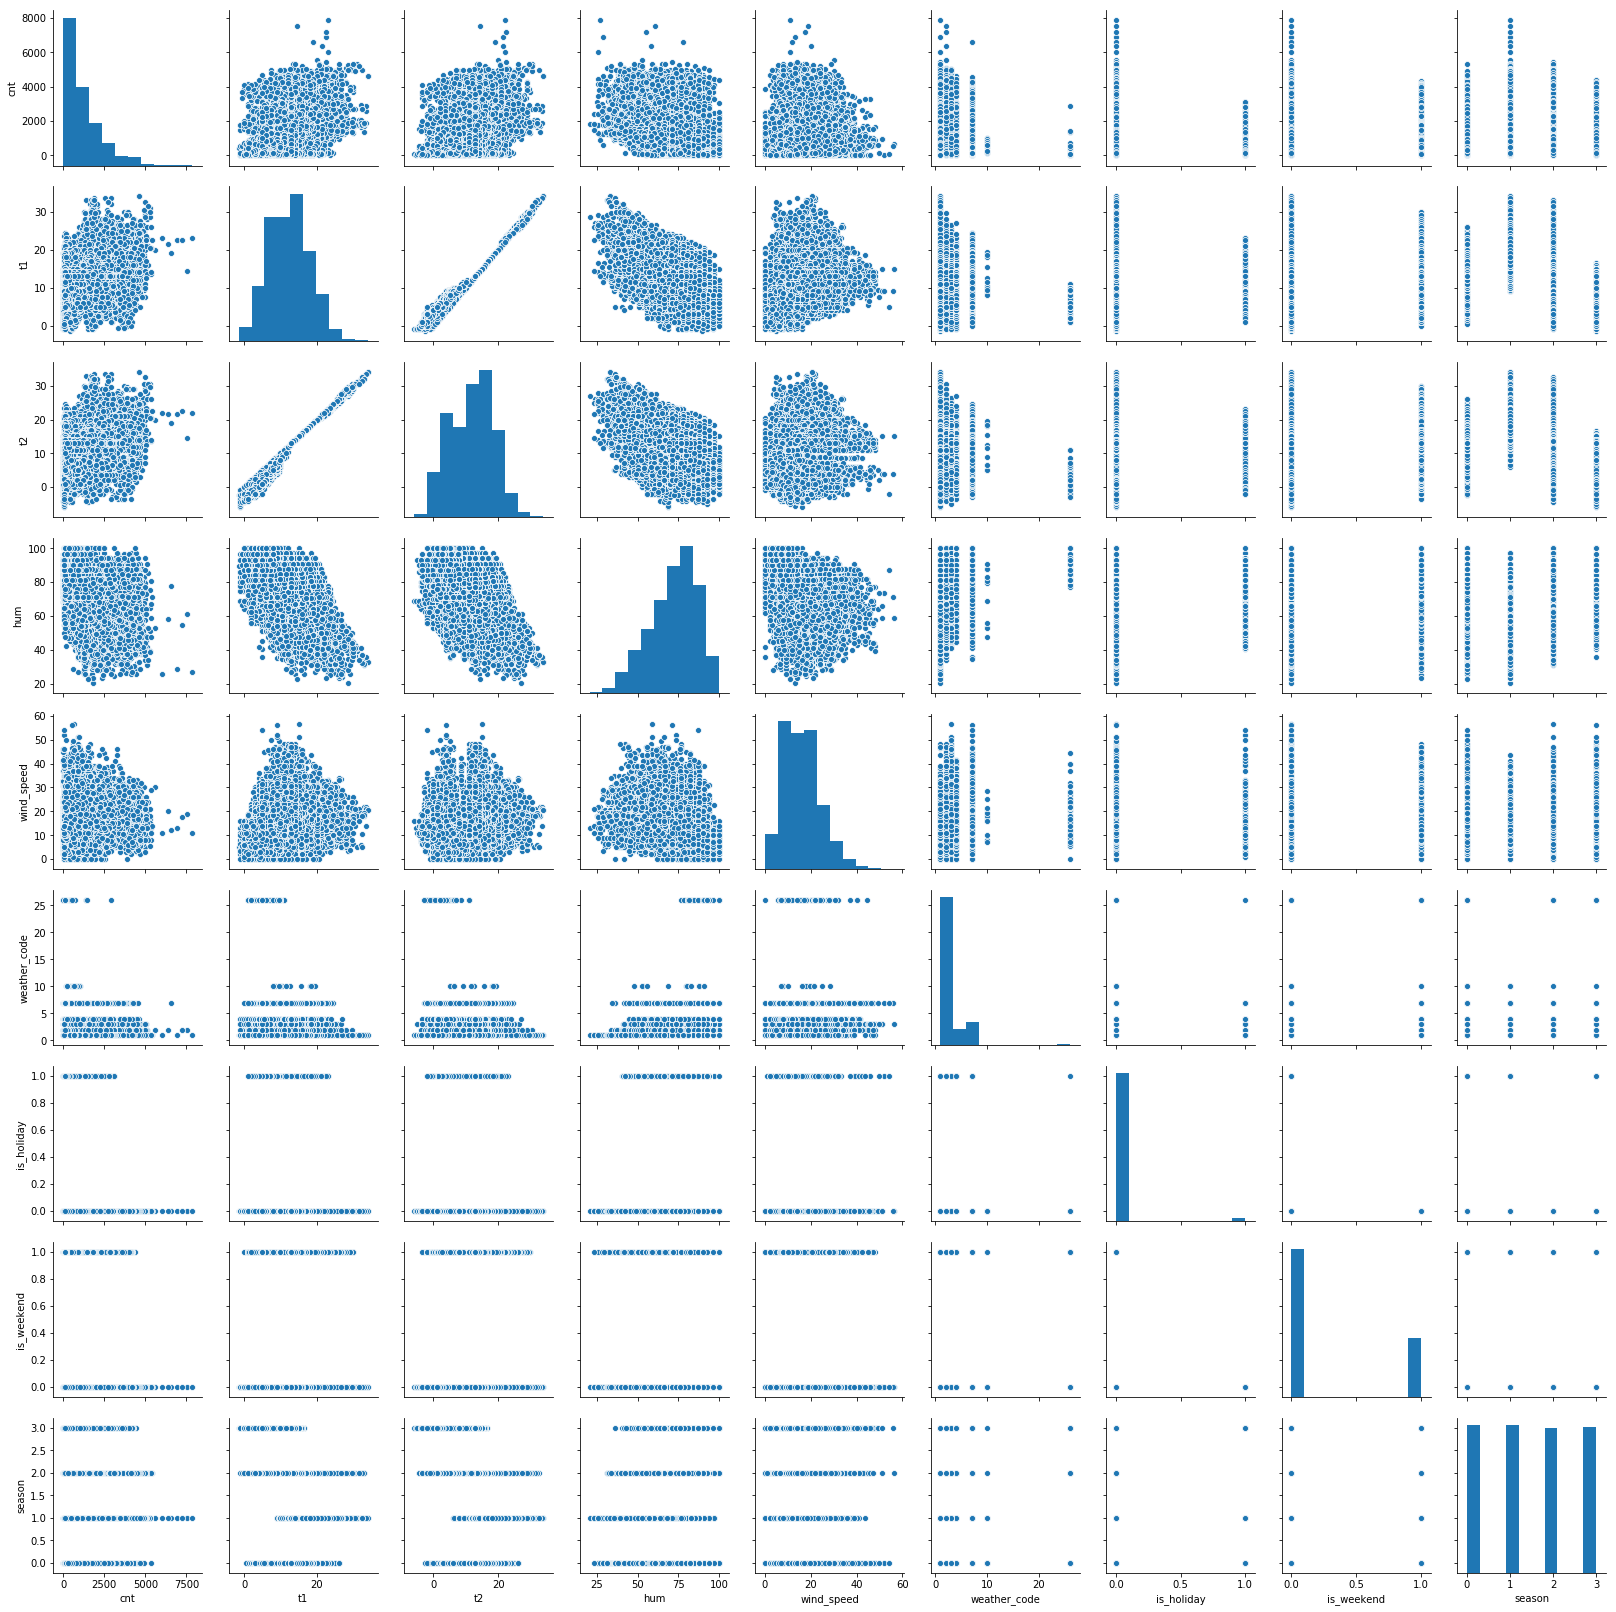

In [8]:
sns.pairplot(bike);

#### What can we tell from the pairplots above?

Try and answer the following questions looking at the plot above:
- Is the week or weekend more popular for bike shares?
- Is there a relationship between weather and season?
- Do holidays affect bike share use?
- Which variables are most highly correlated? Is this surprising?
- Is there a trend between number of bike shares and percentage humidity?
- Which of the numerical variables are normally distributed and which are skewed<br>
<br>
- What do you think will be the best predictors of bike share count?


Click in this box to type notes:




## Introduction to the  groupby function
#### What is the<code>.groupby()</code> function?
An explanation from the [package documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html):<br>
<i>"A groupby operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups"</i>

<code>.groupby()</code> is useful to group data to identify interesting patterns and calculate some summary statistics that give us more insight into the data. <code>.groupby()</code> can also be used to group data before we plot it, to make more interesting graphs and visualisations.


For example say we wanted to see how many days in our dataset are weekend days, and whether this influences bike share usage.

We can group the bike dataframe by <code>'is_weekend'</code>, then use the <code>.size()</code> function to calculate how many days are classified as being a weekend or weekday.
<br> <font color='orchid'> <b>Run the code below </b></font>

In [9]:
# group the bike dataframe by 'is_weekend', then use the .size() function
bike.groupby('is_weekend').size()

is_weekend
0    12444
1     4970
dtype: int64

We can also group the data and then calculate summary statistics (using the functions introduced last workshop: <code>.mean()</code>, <code>.median()</code>, <code>.quantile(0.25)</code>, <code>.max()</code>, <code>.min()</code>)

<br> <font color='orchid'> <b>Run the code below then experiment calculating your own summary statistics on grouped data</b></font>

In [10]:
bike.groupby('is_weekend').mean()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,season
is_weekend,,,,,,,,
0,1209.274831,12.486901,11.556413,72.070797,15.855794,2.660077,0.030858,1.491321
1,977.415694,12.420993,11.431757,72.961318,16.056455,2.879678,0.000000,1.493964


In [11]:
# experiment here


In [12]:
# experiment here


In [13]:
# experiment here


If you are interested in calculating the summary stats. of one column you can put it in squared brackets after the groupby function <br> I.e. <code><font color='red'>dataframe_name</font>.groupby("<font color='red'>column_name to groupby</font>")["<font color='red'>column_name to calc. summary stats for</font>"].mean()</code>

In [14]:
# group the bike dataframe by 'is_weekend' and calcualte the mean number of bike shares ('cnt') for weekdays and weekends
bike.groupby('is_weekend')['cnt'].mean()

is_weekend
0    1209.274831
1     977.415694
Name: cnt, dtype: float64

<font color='orchid'><b> Write your own function to group the bike dataframe by 'is_weekend' and calculate the <b>maximum</b> daily number of bike shares ('cnt') on a weekday and weekend </font>

In [15]:
bike.groupby('is_weekend')['cnt'].max()

is_weekend
0    7860
1    4341
Name: cnt, dtype: int64

<font color='orchid'> <b>Write your own function to calculate the mean number of bike shares for each season </b> </font> (Solution 1 at the bottom if you get stuck)

<font color='orchid'> <b>Write your own function to calculate the maximum number of daily bike shares for each weather type </b></font> (Solution 2 at the bottom if you get stuck)

## Groupby and plotting time series data

Let us plot the total number of bike share uses per day. Currently the bike share data is provided for every hour of every day so we need to group these together to calculate the totals for the day. First of all we need to create a new column for just the date. <br>
We do this using the datetime.date function: <code>.dt.date</code>
<br> <font color='orchid'> <b>Run the code below </b></font>

In [16]:
bike['date']= bike['timestamp'].dt.date

In [17]:
# let's check it has worked
bike.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date
0,2015-04-01 00:00:00,182,3.0,2.0,93.0,6.0,3,0,1,3,2015-04-01
1,2015-04-01 01:00:00,138,3.0,2.5,93.0,5.0,1,0,1,3,2015-04-01
2,2015-04-01 02:00:00,134,2.5,2.5,96.5,0.0,1,0,1,3,2015-04-01
3,2015-04-01 03:00:00,72,2.0,2.0,100.0,0.0,1,0,1,3,2015-04-01
4,2015-04-01 04:00:00,47,2.0,0.0,93.0,6.5,1,0,1,3,2015-04-01


Next we need to use the <code>.groupby()</code> function to get a dataframe where each row is a unqiue day.<br>

To do this we need to think carefully about how we want to aggregate the columns of the dataframe:<br>

For <b>count</b> it makes sense to take the total number of bike share uses across all hours to get the total for the day: therefore we want to aggregate using the <code>.sum()</code> function.<br>

For the <b>temperature, humidity and wind speed</b> variables it does not make sense to take the sum of all hours (we would end up with very high temeperatures, humidities and wind speeds) instead taking the average value of all hours of the day makes more sense, using the <code>.mean()</code> function. <br>

As <b>weather_code</b> is a non-continuous categorical variable, where a number is used to represent the weather conditions, taking the most common hourly weather type during a day is the most sensible way to accurately represent the overall weather for that day. We can do this using the <code>pd.Series.mode</code> function.

For the <b> holiday, weekend, season</b> and <b>date</b> variables they will be the same across all hours of the day, so no calculation is needed. Instead we will just take the first value (for ease) using the <code>.first()</code> function.
<br> <font color='orchid'> <b>Run the code below to test this out </b></font>

In [18]:
# let's test this out
bike.groupby('date')['cnt'].sum()

date
2015-01-02    11305
2015-01-03    15641
2015-01-04    23539
2015-01-05    29579
2015-01-06    27864
2015-01-07    42641
2015-01-08    43017
2015-01-09    25556
2015-01-10    34562
2015-01-11    22848
2015-01-12    26559
2015-01-13    24697
2015-01-14    23565
2015-01-15    22968
2015-01-16    22663
2015-01-17    15268
2015-01-18    13199
2015-01-19    23034
2015-01-20    23247
2015-01-21    22782
2015-01-22    23278
2015-01-23    21892
2015-01-24    17539
2015-01-25    15094
2015-01-26    22710
2015-01-27    25000
2015-01-28    21536
2015-01-29    21275
2015-01-30    21171
2015-01-31    10250
              ...  
2016-12-05    38082
2016-12-06    17841
2016-12-07    29869
2016-12-08    40159
2016-12-09    39261
2016-12-10    32282
2016-12-11     8990
2016-12-12    25275
2016-12-13    26520
2016-12-14    28861
2016-12-15    28195
2016-12-16    27621
2016-12-17    17238
2016-12-18    14970
2016-12-19    23535
2016-12-20    24864
2016-12-21    23136
2016-12-22    21461
2016-12-23    1

In [19]:
# let's test this out
# we can add .head() to show just the first 5 lines
bike.groupby('date')['t1','t2','hum','wind_speed'].mean().head()

,t1,t2,hum,wind_speed
date,,,,
2015-01-02,3.791667,-0.895833,67.000000,24.770833
2015-01-03,9.187500,6.416667,66.687500,29.583333
2015-01-04,8.500000,4.937500,59.854167,31.708333
2015-01-05,9.083333,7.229167,64.250000,18.875000
2015-01-06,12.104167,11.437500,62.833333,23.645833


In [20]:
# let's test this out
bike.groupby('date')['weather_code'].apply(pd.Series.mode).head()

date         
2015-01-02  0    3
2015-01-03  0    2
2015-01-04  0    2
2015-01-05  0    2
2015-01-06  0    2
Name: weather_code, dtype: int64

In [21]:
# let's test this out
bike.groupby('date')['is_holiday','is_weekend','season','date'].first().head()

,is_holiday,is_weekend,season,date
date,,,,
2015-01-02,0,1,3,2015-01-02
2015-01-03,0,1,0,2015-01-03
2015-01-04,0,0,0,2015-01-04
2015-01-05,0,0,0,2015-01-05
2015-01-06,0,0,1,2015-01-06


We can do this all separately, but what if we want to produce a dataframe of the aggregated by day bike data?
It is not just as easy as directly combining the above code.
<font color='orchid'> Try running the code below and note the error message </font>

In [22]:
bike.groupby('date')['t1','t2','hum','wind_speed'].mean()['is_holiday','is_weekend','season','date'].first()

KeyError: ('is_holiday', 'is_weekend', 'season', 'date')

To solve this we can use <code>.agg({})</code> function to apply ["one or more operations over the specified axis"](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html).
<br> For each column we specify which function we want to apply to the aggreagated rows.<br>
The <code>{}</code> indicate a dictionary object where a set of objects (keys) are mapped to another set of objects (values)
i.e. the column is mapped to the required aggregation method.

<font color='orchid'> Run the code below and check you understand what it is doing </font>

In [23]:
bike_day = bike.groupby('date').agg({'cnt':'sum', 't1':'mean','t2':'mean','hum':'mean','wind_speed':'mean','weather_code':pd.Series.mode,'is_holiday':'first','is_weekend':'first','season':'first','date':'first'})
bike_day.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date
date,,,,,,,,,,
2015-01-02,11305,3.791667,-0.895833,67.000000,24.770833,3,0,1,3,2015-01-02
2015-01-03,15641,9.187500,6.416667,66.687500,29.583333,2,0,1,0,2015-01-03
2015-01-04,23539,8.500000,4.937500,59.854167,31.708333,2,0,0,0,2015-01-04
2015-01-05,29579,9.083333,7.229167,64.250000,18.875000,2,0,0,0,2015-01-05
2015-01-06,27864,12.104167,11.437500,62.833333,23.645833,2,0,0,1,2015-01-06


In [3]:
# change figure size
plt.figure(figsize=(15,6))

ax = sns.pointplot(x="date", y="cnt", data=bike_day, hue='is_weekend', marker='.', scale=0.4)
# hide x-axis lables
ax.xaxis.set_ticklabels([])
ax.xaxis.set_ticks([]);

NameError: name 'bike_day' is not defined

<Figure size 1080x432 with 0 Axes>

In [25]:
# change figure size
plt.figure(figsize=(15,6))

g = sns.pointplot(x="date", y="cnt", data=bike_day, hue='season', row = 'season',marker='.', scale=0.4, ax=ax)
# hide x-axis lables
ax.xaxis.set_ticklabels([])
ax.xaxis.set_ticks([]);

<Figure size 1080x432 with 0 Axes>

## What influences bike share use?

Temperature seems a likely candidate to influence bike share usage, particularly in the UK- few people enjoy cycling in the freezing cold. But may hot temperatures also put people off cycling? <br>

Let's plot a <code>lmplot()</code> to fit a regression model to the actual temperature and count columns. <br>
<font color='orchid'> Run the code below </font>

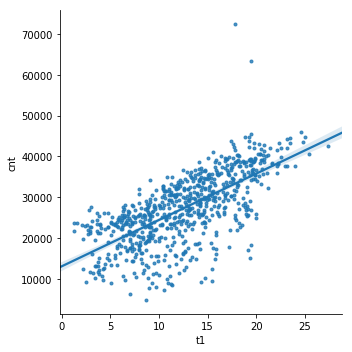

In [26]:
sns.lmplot(x="t1", y="cnt", data=bike_day, markers='.');

There is a pretty strong positive association between increased temperature and number of bike share uses. And warmer temperatures do not seem to be putting people off.

Does whether it is the weekend or not moderate how temperature is associated with the number of bike share uses? <br>
Let's fit another <code>lmplot()</code> this time specifying <code>hue</code> as 'is_weekend'. <br>
<font color='orchid'> Run the code below </font>

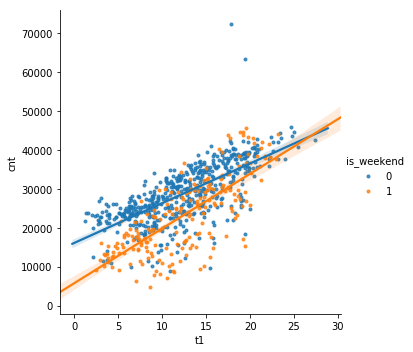

In [27]:
g = sns.lmplot(x="t1", y="cnt", hue="is_weekend", data=bike_day, markers='.');

Look at how the season moderates the correlation between temperature and number of bike share uses.<br>
<font color='orchid'> Run the code below </font>

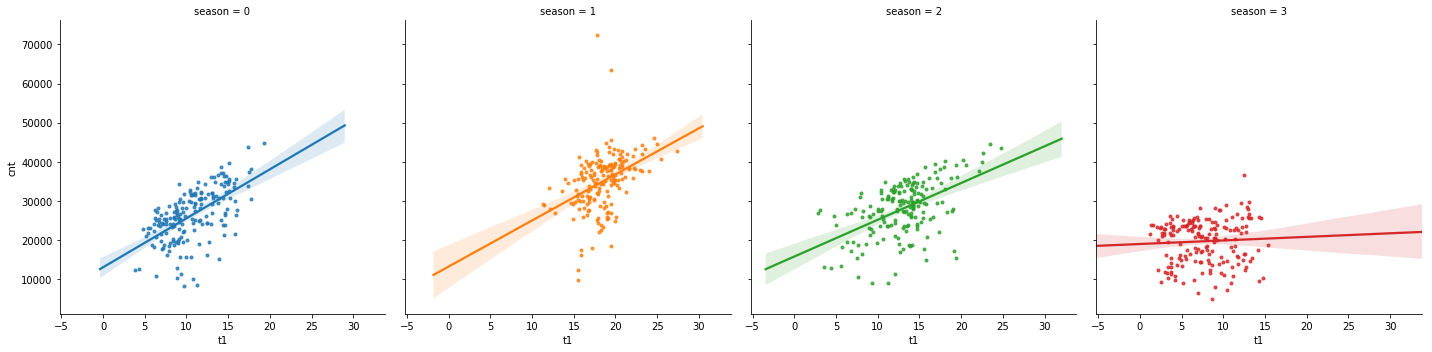

In [28]:
g = sns.lmplot(x="t1", y="cnt", hue="season", col="season", data=bike_day, markers='.');

<font color='orchid'> <b>Create other lmplots to explore how well the variables predict count of bike share uses </font> <br> Look at the solutions for some more examples

In [ ]:
# lmplot()

In [ ]:
# lmplot()

In [ ]:
# lmplot()

# Linear Regression

As previously mentioned the stats. theory around regression will not be covered in great detail. We will just introduce you to running regression analysis in python and some useful other tools and visualisations to help you.

### Correlation
Before conducting a regression analysis it is important to understand which explanatory variables (X) may be correlated. We can explore this using the <code>.corr()</code> function. <br>
Results will be between -1 (absolute negative correlation to +1 (absoulte positive correlation)
<br> <font color='orchid'> <b>Run the code below </b></font>

In [29]:
bike.corr()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
cnt,1.000000,0.388798,0.369035,-0.462901,0.116295,-0.166633,-0.051698,-0.096499,-0.116180
t1,0.388798,1.000000,0.988344,-0.447781,0.145471,-0.097114,-0.042233,-0.005342,-0.285851
t2,0.369035,0.988344,1.000000,-0.403495,0.088409,-0.098385,-0.040051,-0.008510,-0.285900
hum,-0.462901,-0.447781,-0.403495,1.000000,-0.287789,0.334750,0.032068,0.028098,0.290381
wind_speed,0.116295,0.145471,0.088409,-0.287789,1.000000,0.124803,-0.002606,0.011479,0.010305
weather_code,-0.166633,-0.097114,-0.098385,0.334750,0.124803,1.000000,0.012939,0.042362,0.098976
is_holiday,-0.051698,-0.042233,-0.040051,0.032068,-0.002606,0.012939,1.000000,-0.094898,-0.032488
is_weekend,-0.096499,-0.005342,-0.008510,0.028098,0.011479,0.042362,-0.094898,1.000000,0.001067
season,-0.116180,-0.285851,-0.285900,0.290381,0.010305,0.098976,-0.032488,0.001067,1.000000


This is a useful set of information, but quite difficult to quickly compare values across columns and rows. We can plot a <code>sns.heatmap()</code> which colours each cell depending on the level of correlation between the column and row variables.]<br> <font color='orchid'> <b>Run the code below </b></font>

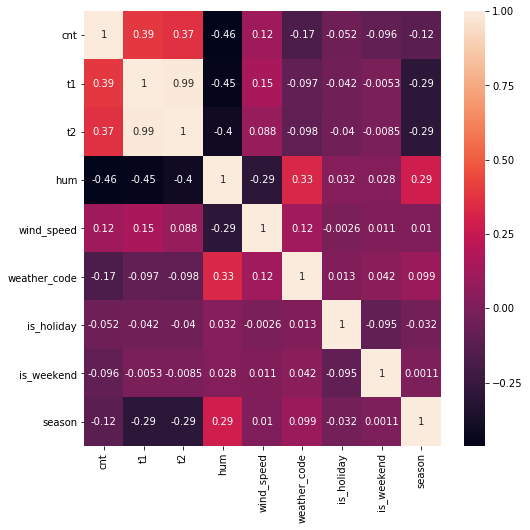

In [30]:
# set figure size
plt.figure(figsize=(8,8))
# plot a heatmap of the correlation table created above, annot= True annotates the cells with the correlation value
sns.heatmap(bike.corr(), annot=True);

In [31]:
# import required regression packages
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

## Simple Linear Regression

To make it simple we are going to first show you how to predict continuous data, so we will be prediciting temperature
<br> <font color='orchid'> <b>Run the code below </b></font>

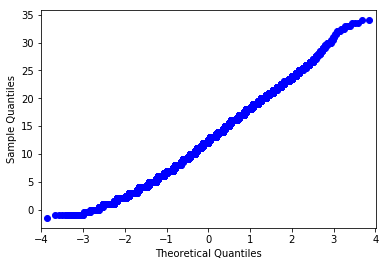

In [32]:
# plot a qqplot to see if t1 is normally distributed (package imported above)
qqplot(bike['t1']);

't1' looks fairly normally distibuted so we will go ahead and build a simple linear regresssion model

## Fitting an OLS model
<br> <font color='orchid'> <b>Run the code below, using the comments to aid your understanding </b></font>

In [45]:
# predict temperature given the known number of bike shares

# define X and y
X = bike["cnt"] # explanatory variable
y = bike["t1"] # dependent variable

# Fit the model
model = sm.OLS(y, X).fit()

predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     t1   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                 2.558e+04
Date:                Mon, 11 Nov 2019   Prob (F-statistic):               0.00
Time:                        14:14:27   Log-Likelihood:                -62363.
No. Observations:               17414   AIC:                         1.247e+05
Df Residuals:                   17413   BIC:                         1.247e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cnt            0.0067   4.18e-05    159.950      0.000       0.007       0.007
==============================================================================
Omnibus:                     2115.295   Durbin-Watson:                   0.300
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3310.304
Skew:                          -0.870   Prob(JB):                         0.00
Kurtosis:                       4.240   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model evaluation
To interpret these results, we need to look at the following results:<br>

<b>R$^{2}$</b> - this tells us the precentage of the dependent variable explained by the model. R-square is always between 0% and 100%, 100% suggesting that the model explains all the variability in the data. Here, r-square is 0.595, indicating that the model explains 59.5% of the variability, and therefore suggesting that the model fits the data fairly well. <br>

<b>P value </b>- the p-value tells us whether the relationship could have happened by chance. Small values (<0.05) mean that these results are significant, and probably did not occur by chance, showing us that there is a relationship between these variables. This is the case here, as the reuslts show us that the P value is 0.000. <br>

<b>AIC</b> - if you have several models, the AIC can be used to assess how good one model is compared to the others, and can therefore be used to identify the best model. As a general rule, a decrease of more than 3 suggests a model improvement.<br>

<b>Coefficient</b> - coefficients represent the mean change in the dependent variable (i.e. temperature) for one unit of change in the explanatory variable (i.e. bike count). So, here, for every additional bike used, we can expect that the temperature increases by 0.0067. 

Have a look at R$^{2}$, AIC, the coefficent and P>|t| (p value) to evaluate model fit

### Creating dummy variables

For categorical variables to be entered into a OLS they need to be converted to dummy variables. <br>

<font color='orchid'> <b>Run the code below to create a dataframe "bike_dummies" with dummy variables in.<br>
    
Try printing 'weather_dummies' and 'hol_dummies' to get an idea of what the dummy variables look like. </font>


In [44]:
season_dummies = pd.get_dummies(bike['season'], prefix='season')
weather_dummies = pd.get_dummies(bike['weather_code'], prefix='weather')
hol_dummies = pd.get_dummies(bike['is_holiday'], prefix='hol')
wk_dummies = pd.get_dummies(bike['is_weekend'], prefix='wk')
bike_dummies = pd.concat([bike, season_dummies, weather_dummies, hol_dummies, wk_dummies], axis=1)
bike_dummies.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,...,weather_2,weather_3,weather_4,weather_7,weather_10,weather_26,hol_0,hol_1,wk_0,wk_1
0,2015-04-01 00:00:00,182,3.0,2.0,93.0,6.0,3,0,1,3,...,0,1,0,0,0,0,1,0,0,1
1,2015-04-01 01:00:00,138,3.0,2.5,93.0,5.0,1,0,1,3,...,0,0,0,0,0,0,1,0,0,1
2,2015-04-01 02:00:00,134,2.5,2.5,96.5,0.0,1,0,1,3,...,0,0,0,0,0,0,1,0,0,1
3,2015-04-01 03:00:00,72,2.0,2.0,100.0,0.0,1,0,1,3,...,0,0,0,0,0,0,1,0,0,1
4,2015-04-01 04:00:00,47,2.0,0.0,93.0,6.5,1,0,1,3,...,0,0,0,0,0,0,1,0,0,1


To enter the categorical variables into the model, add all the dummy variables bar one

<br> <font color='orchid'> <b>Have a go at writitng your own code to create the following OLS models:</b></font>
1. y: t1,   X: hum, wind_speed
- y: t1,    X: t2
- y: t1,    X: season (i.e. season_0, season_1, season_2) <- see example below
- y: t1,    X: weather_code
- y: t1,    X: hum, wind_speed, season, weather_code

In [ ]:
# q1

In [ ]:
# q2

In [46]:
# q3 from above

# define X and y
# note [[]] when defining more than one explanatory variables in a list
X = bike_dummies[["season_0","season_1","season_2"]] # explanatory variable 
y = bike_dummies["t1"] # dependent variable

# Fit the model
model = sm.OLS(y, X).fit()

predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     t1   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                 3.004e+04
Date:                Mon, 11 Nov 2019   Prob (F-statistic):               0.00
Time:                        14:14:34   Log-Likelihood:                -54380.
No. Observations:               17414   AIC:                         1.088e+05
Df Residuals:                   17411   BIC:                         1.088e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season_0      10.6667      0.083    128.664      0.000      10.504      10.829
season_1      18.4312      0.083    222.144      0.000      18.269      18.594
season_2      13.0392      0.084    155.645      0.000      12.875      13.203
==============================================================================
Omnibus:                      449.953   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              471.513
Skew:                           0.389   Prob(JB):                    4.10e-103
Kurtosis:                       2.790   Cond. No.                         1.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# q4
# remember weather_code is a categorical variable

In [ ]:
# q5

### Predicting bike share use
To predict bike share use ('cnt') we need to use a poisson generalsied linear model as it is a count outcome.
<br> <font color='orchid'> <b>Run the code below </b></font>

In [36]:
# import the required package
import statsmodels.formula.api as smf

## Fit GLM
<font color='orchid'> <b>Run the code below </b></font>

In [47]:
# Fit the model

# Define the model equation using formual
# use C() to denote categorical variables
model2 = smf.glm(formula = "cnt ~ t1 + C(season) + hum + wind_speed ",\
                #specify data source
                data=bike,\
                # specify poisson transformation
                family=sm.families.Poisson()).fit()

# Print out the summary statistics of the model
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    cnt   No. Observations:                17414
Model:                            GLM   Df Residuals:                    17407
Model Family:                 Poisson   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -6.2959e+06
Date:                Mon, 11 Nov 2019   Deviance:                   1.2448e+07
Time:                        14:14:42   Pearson chi2:                 1.49e+07
No. Iterations:                     5   Covariance Type:             nonrobust
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          7.9865      0.002   4401.633      0.000       7.983       7.990
C(season)[T.1]    -0.0575      0.001    -75.288      0.000      -0.059      -0.056
C(season)[T.2]     0.1641      0.001    236.462      0.000       0.163       0.165
C(season)[T.3]     0.0826      0.001    111.272      0.000       0.081       0.084
t1                 0.0391   6.23e-05    628.373      0.000       0.039       0.039
hum               -0.0220   1.83e-05  -1200.614      0.000      -0.022      -0.022
wind_speed         0.0005   2.99e-05     17.016      0.000       0.000       0.001
==================================================================================
"""

### Plotting Predicted vs Actual
We are going to plot predicted 'cnt' against actual 'cnt' to evaluate our model.<br>
The closer the points to a straight diagonal line the better the fit.
<br> <font color='orchid'> <b>Run the code below </b></font>

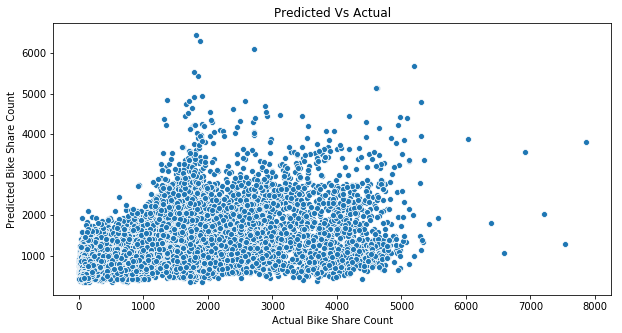

In [38]:
fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot( bike['cnt'],model2.fittedvalues);

# label title and axis
ax.set_title('Predicted Vs Actual')
ax.set_xlabel('Actual Bike Share Count')
ax.set_ylabel('Predicted Bike Share Count');

Play arround with different variables in the model and see how they affect the model fit. (Don't forget to use<code>C()</code> for categorical variables).

<font color='orchid'> <b>Experiment with the model variables below </font> <br> 

### Plotting Residuals
<font color='orchid'> <b>Run the code below </b></font>

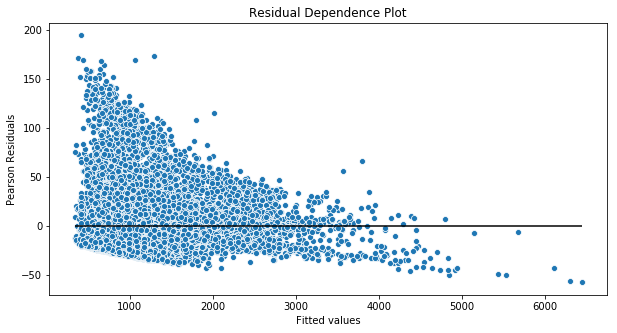

In [39]:
# Plot residuals plot

fig, ax = plt.subplots(figsize=(10,5))

a =sns.scatterplot(model2.fittedvalues, model2.resid_pearson)

# plot a line at y=0, for values of x between the minimum and maximum fitted values
ax.hlines(0, model2.fittedvalues.min(),model2.fittedvalues.max())

# label title and axis
ax.set_title('Residual Dependence Plot')
ax.set_ylabel('Pearson Residuals')
ax.set_xlabel('Fitted values');

## Test and training data

Using test and train datasets is a good way to make sure your model isn't overfitting to the data you have. <br>
<font color='orchid'> <b>Run the code below to create your own test and train datasets</b></font>

In [40]:
# you can also create test and train datasets
# randomly select 80% of bike rows
mask =np.random.rand(len(bike))<0.8
# create train dataset with 80% of data
bike_train = bike[mask]
# create train dataset with remaining 20% of data
bike_test = bike[~mask]
# print leght of each dataset
print('Training data set length='+str(len(bike_train)))
print('Testing data set length='+str(len(bike_test)))

Training data set length=13958
Testing data set length=3456


Try using the <code>bike_train</code> to fit the model. Then evaluate the model using the test data. <br>
<font color='orchid'><b> Run the code below </font>

In [41]:
# Define the model equation using formual
# use C() to denote categorical variables
model3 = smf.glm(formula = "cnt ~ t1 + C(season) + hum + wind_speed ",\
                #specify data source
                data=bike_train,\
                # specify poisson transformation
                family=sm.families.Poisson()).fit()
predicted = model3.predict(bike_test)
# Print out the summary statistics of the model
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    cnt   No. Observations:                13958
Model:                            GLM   Df Residuals:                    13951
Model Family:                 Poisson   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -5.0924e+06
Date:                Mon, 11 Nov 2019   Deviance:                   1.0069e+07
Time:                        13:37:10   Pearson chi2:                 1.21e+07
No. Iterations:                     5   Covariance Type:             nonrobust
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          7.9912      0.002   3943.609      0.000       7.987       7.995
C(season)[T.1]    -0.0571      0.001    -67.078      0.000      -0.059      -0.055
C(season)[T.2]     0.1816      0.001    234.661      0.000       0.180       0.183
C(season)[T.3]     0.0835      0.001    100.766      0.000       0.082       0.085
t1                 0.0392   6.93e-05    565.224      0.000       0.039       0.039
hum               -0.0220   2.04e-05  -1078.157      0.000      -0.022      -0.022
wind_speed         0.0004   3.32e-05     12.056      0.000       0.000       0.000
==================================================================================
"""

<font color='orchid'><b> Run the code below to see the predicted values from test dataset versus the actual test dataset bike share count </font>

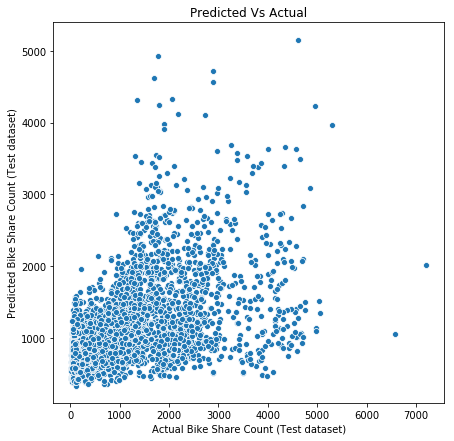

In [42]:
fig, ax = plt.subplots(figsize=(7,7))

ax = sns.scatterplot(bike_test['cnt'],predicted)

# label title and axis
ax.set_title('Predicted Vs Actual')
ax.set_xlabel('Actual Bike Share Count (Test dataset)')
ax.set_ylabel('Predicted Bike Share Count (Test dataset)');

<img style="float: left;margin:0 10px 10px 0" src="Intro_to_Python_2\DSS_logo2.png" width=80> <img style="float: right;margin:0 10px 10px 0" src="Intro_to_Python_2\DSS_logo2.png" width=80>
<h1><center> <font color ='orange'>THE END OF WORKSHOP 2 </h1></center>
    

# Solutions

Solution 1: <br>
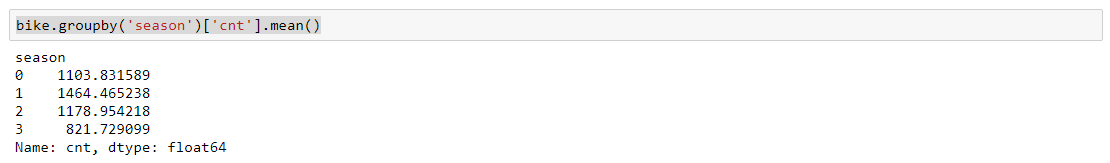

Solution 2: <br>
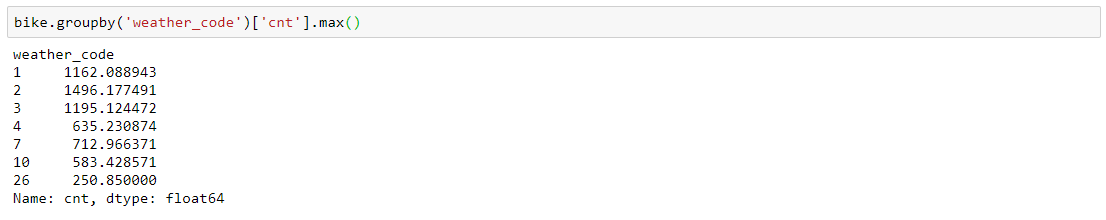